### This is the dataset link https://www.kaggle.com/datasets/fatemehmehrparvar/dementia/data

In [180]:
#import stuffs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
#my dementia dataset see if it works
dataset = pd.read_csv('C:/Users/tp-limwj/Downloads/dementia.csv')
dataset.head()

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0


In [182]:
#Data types of each variable
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1842 non-null   int64  
 1   age                   1842 non-null   float64
 2   gender                1842 non-null   object 
 3   dementia              1808 non-null   float64
 4   dementia_all          1842 non-null   int64  
 5   educationyears        1842 non-null   float64
 6   EF                    1634 non-null   float64
 7   PS                    1574 non-null   float64
 8   Global                1534 non-null   float64
 9   diabetes              1842 non-null   int64  
 10  smoking               1831 non-null   object 
 11  hypertension          1842 non-null   object 
 12  hypercholesterolemia  1842 non-null   object 
 13  lacunes_num           1842 non-null   object 
 14  fazekas_cat           1842 non-null   object 
 15  study                

In [183]:
#delete useless columns that idk like dementia, lacunes_num(cus alr in lac_count), study, study1 and fazekas_cat
dataset_clean = dataset.copy()
columns_to_drop = ['dementia', 'lacunes_num', 'study', 'study1', 'fazekas_cat']
dataset_clean.drop(columns = columns_to_drop, axis =1, inplace=True)
dataset_clean.head()

,ID,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0,11.0,-2.403333,-1.290000,-1.287000,0,current-smoker,Yes,Yes,3.0,7.0,3,>5,>=1
1,10,64.58,male,0,10.0,1.280000,0.360000,0.744000,0,ex-smoker,Yes,Yes,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0,8.0,-1.440000,-1.520000,-0.922000,0,never-smoker,Yes,Yes,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1,9.0,NaN,-2.136271,-1.301102,0,current-smoker,Yes,Yes,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0,10.0,-0.920000,-1.493333,-0.924000,0,ex-smoker,Yes,Yes,2.0,3.0,2,1 to 2,0


In [184]:
dataset2 = dataset_clean.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name           # of Null Values\n")
print(dataset2.isnull().sum())

# of Rows, # of Columns:  (1842, 16)

Column Name           # of Null Values

ID                        0
age                       0
gender                    0
dementia_all              0
educationyears            0
EF                      208
PS                      268
Global                  308
diabetes                  0
smoking                  11
hypertension              0
hypercholesterolemia      0
SVD Simple Score        677
SVD Amended Score       677
Fazekas                   0
lac_count                 0
dtype: int64


In [185]:
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name              % Null Values\n")
print(dataset2.isnull().sum()/1842*100) #1842 is the total number of data

# of Rows, # of Columns:  (1842, 16)

Column Name              % Null Values

ID                       0.000000
age                      0.000000
gender                   0.000000
dementia_all             0.000000
educationyears           0.000000
EF                      11.292074
PS                      14.549403
Global                  16.720955
diabetes                 0.000000
smoking                  0.597177
hypertension             0.000000
hypercholesterolemia     0.000000
SVD Simple Score        36.753529
SVD Amended Score       36.753529
Fazekas                  0.000000
lac_count                0.000000
dtype: float64


In [186]:
#Extraction of possible data leakage variables such as SVD SIMPLe score and amended score
dataset_leakage = pd.DataFrame(dataset_clean[['SVD Simple Score', 'SVD Amended Score', 'dementia_all']])
display(dataset_leakage)

,SVD Simple Score,SVD Amended Score,dementia_all
0,3.0,7.0,0
1,2.0,3.0,0
2,1.0,2.0,0
3,2.0,4.0,1
4,2.0,3.0,0
...,...,...,...
1837,NaN,NaN,0
1838,NaN,NaN,0
1839,0.0,0.0,0
1840,0.0,0.0,0


In [187]:
dataset_leakage.corr()

,SVD Simple Score,SVD Amended Score,dementia_all
SVD Simple Score,1.000000,0.901032,0.233746
SVD Amended Score,0.901032,1.000000,0.286705
dementia_all,0.233746,0.286705,1.000000


#### Thus 0.23/0.28, not much correlation to prob of dementia, so no data leakage

#### Data Cleaning

In [188]:
# fill up empty SVD simple and amended score with mean of data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
columns_to_impute = ['EF', 'PS', 'Global','SVD Simple Score', 'SVD Amended Score']
dataset_clean_mean = dataset_clean.copy()
dataset_clean_mean[columns_to_impute] = imputer.fit_transform(dataset_clean_mean[columns_to_impute])

#median
dataset_clean_median = dataset_clean.copy()
imputer = SimpleImputer(strategy = 'median')
dataset_clean_median[columns_to_impute] = imputer.fit_transform(dataset_clean_median[columns_to_impute])

#most_frequent
dataset_clean_mostfreq = dataset_clean.copy()
imputer = SimpleImputer(strategy = 'most_frequent')
dataset_clean_mostfreq[columns_to_impute] = imputer.fit_transform(dataset_clean_mostfreq[columns_to_impute])

In [189]:
dataset_encoded_mean = pd.get_dummies(dataset_clean_mean, drop_first=True) #using one-hot encoding, remove the first level to reduce no of columns
dataset_encoded_mean.describe()

dataset_encoded_median = pd.get_dummies(dataset_clean_median, drop_first=True)
dataset_encoded_mostfreq = pd.get_dummies(dataset_clean_mostfreq, drop_first=True)

##### Testing XGboost for mean

Accuracy: 0.9351351351351351
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       173
           1       0.00      0.00      0.00        12

    accuracy                           0.94       185
   macro avg       0.47      0.50      0.48       185
weighted avg       0.87      0.94      0.90       185

ROC-AUC Score: 0.9022157996146436


C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_cla

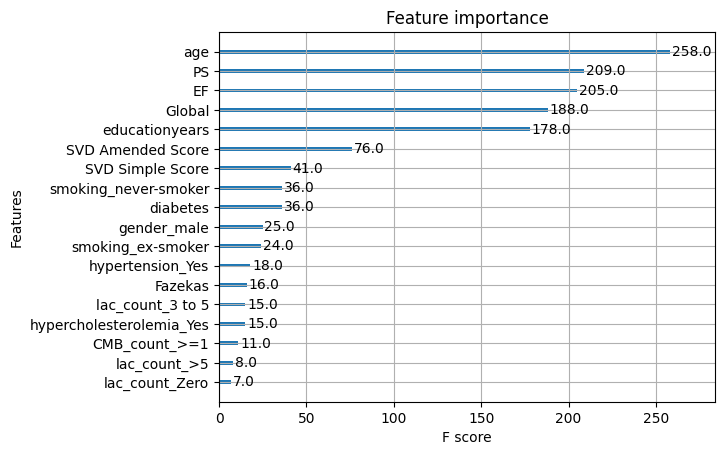

[[173   0]
 [ 12   0]]


In [190]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier #regressor used for continuous variables
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

X = dataset_encoded_mean.drop(['dementia_all', 'ID'], axis=1) #all features
y = dataset_encoded_mean['dementia_all'] #target

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y) #split into 118
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state= 123, stratify = y_test_val) #50% of 20% is 10%

model = XGBClassifier(n_estimators=100, max_depth=5 , colsample_bytree=0.8, learning_rate=0.05, random_state=123) #colsample_bytree is randomly selecting a fraction of features
model.fit(X_train, y_train)

# Evaluating based on validation set
y_pred_val = model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)[:, 1]

# Evaluate the model based on validation set
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred_val)) #recall is ratio of correctly predicted positives to all observations
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba_val)) #trade off between true positive and false positive
#i used the actual y value which is 0 or 1 instead of a probability thats being predicted, so now this using proba, its more accurate
# Feature importance
import xgboost as xgb
xgb.plot_importance(model) #fscore is how many times a feature is used in all trees
plt.show()

y_pred_matrix = (y_pred_proba_val > 0.5).astype(int)
conf_matrix = confusion_matrix(y_val, y_pred_matrix)
print(conf_matrix)

##### Grid Search for optimal parameters for xgbclassifier

In [191]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.3, 0.7, 0.8],
    'subsample' : [0.5, 0.7, 1.0]
}
#Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=cv) #n_jobs = -1 means use all processors
grid_search.fit(X_train, y_train)

#show best para and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best ROC-AUC score from grid search: {best_score}")

Best parameters: {'colsample_bytree': 0.7, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best ROC-AUC score from grid search: 0.8146304771590813


Accuracy: 0.9347826086956522
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       173
           1       0.00      0.00      0.00        11

    accuracy                           0.93       184
   macro avg       0.47      0.50      0.48       184
weighted avg       0.88      0.93      0.91       184

ROC-AUC Score: 0.8129269574356279


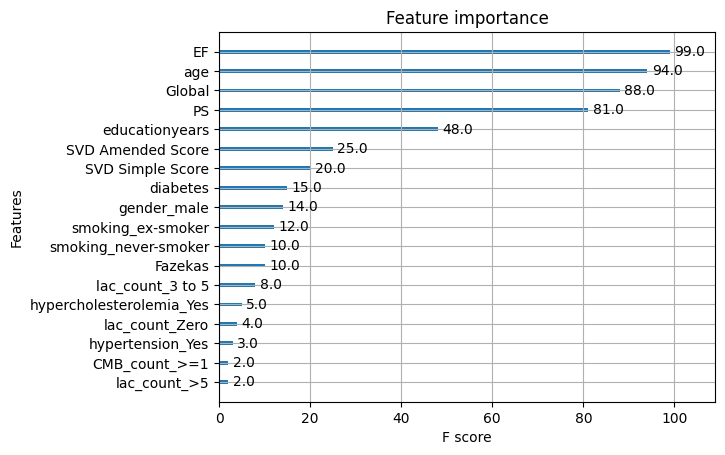

[[172   1]
 [ 11   0]]


In [192]:
#Train model with best para
best_model = XGBClassifier(n_estimators=100, max_depth=3 , colsample_bytree=0.7, subsample = 1.0, random_state=123)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
print(f"ROC-AUC Score: {roc_auc}")

# Feature importance
xgb.plot_importance(best_model)
plt.show()

y_pred_matrix_val = (y_pred_proba > 0.5).astype(int)
conf_matrix_val = confusion_matrix(y_test, y_pred_matrix_val)
print(conf_matrix_val)

##### XGBoost for median

Accuracy: 0.9351351351351351
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       173
           1       0.00      0.00      0.00        12

    accuracy                           0.94       185
   macro avg       0.47      0.50      0.48       185
weighted avg       0.87      0.94      0.90       185

ROC-AUC Score: 0.9022157996146435


C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_cla

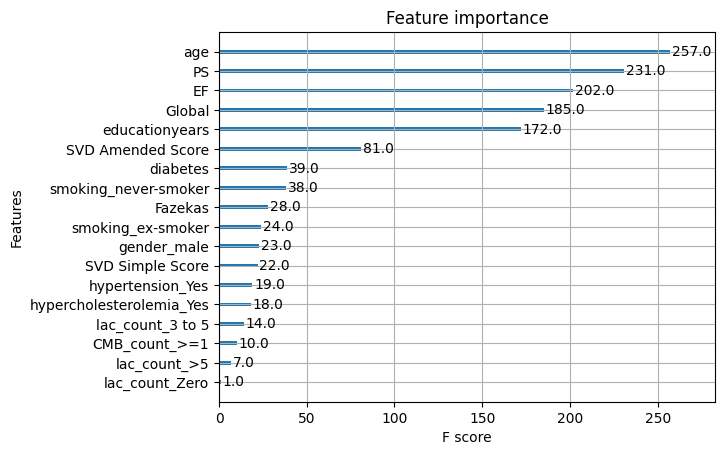

[[173   0]
 [ 12   0]]


In [193]:
X = dataset_encoded_median.drop(['dementia_all', 'ID'], axis=1) #all features
y = dataset_encoded_median['dementia_all'] #target

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y ) #split into 118
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state= 123, stratify = y_test_val) #50% of 20% is 10%

model.fit(X_train, y_train)
# Evaluating based on validation set
y_pred_val = model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)[:, 1]

# Evaluating the model based on validation set
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred_val))
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba_val)) 

# Feature importance
import xgboost as xgb
xgb.plot_importance(model) #fscore is how many times a feature is used in all trees
plt.show()

y_pred_matrix_val = (y_pred_proba_val > 0.5).astype(int)
conf_matrix_val = confusion_matrix(y_val, y_pred_matrix_val)
print(conf_matrix_val)

##### XGBoost for most_freq

Accuracy: 0.9351351351351351
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       173
           1       0.00      0.00      0.00        12

    accuracy                           0.94       185
   macro avg       0.47      0.50      0.48       185
weighted avg       0.87      0.94      0.90       185

ROC-AUC Score: 0.894990366088632


C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_cla

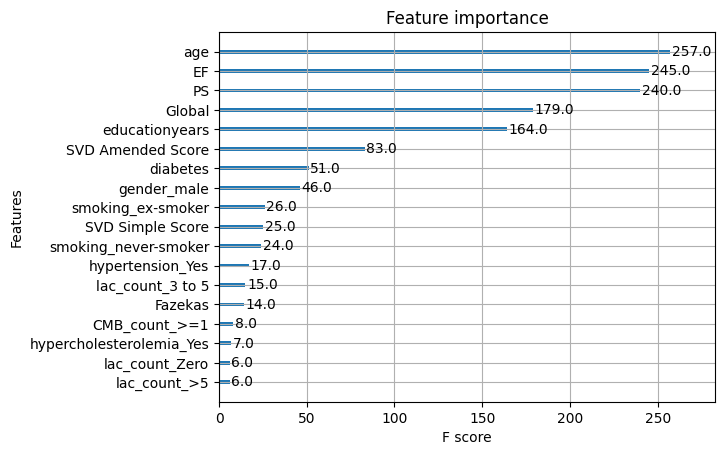

[[173   0]
 [ 12   0]]


In [194]:
X = dataset_encoded_mostfreq.drop(['dementia_all', 'ID'], axis=1) #all features
y = dataset_encoded_mostfreq['dementia_all'] #target

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y) #split into 118
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state= 123, stratify = y_test_val) #50% of 20% is 10%

model.fit(X_train, y_train)
# Evaluating based on validation set
y_pred_val = model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)[:, 1]

# Evaluating the model based on validation set
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred_val))
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba_val)) 

# Feature importance
import xgboost as xgb
xgb.plot_importance(model) #fscore is how many times a feature is used in all trees
plt.show()

y_pred_matrix_val = (y_pred_proba_val > 0.5).astype(int)
conf_matrix_val = confusion_matrix(y_val, y_pred_matrix_val)
print(conf_matrix_val)


##### Using mutual Information to select the most relevant features to predict dementia

In [195]:
#X and y is using the most_freq dataset
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
mi_df_sorted = mi_df.sort_values(by='mi_score', ascending=False)
mi_df_sorted.head(20) #print out the dataframe 

,feature,mi_score
4,Global,0.033499
7,SVD Amended Score,0.032588
2,EF,0.030720
3,PS,0.030362
6,SVD Simple Score,0.025263
0,age,0.024256
17,CMB_count_>=1,0.018254
1,educationyears,0.014159
8,Fazekas,0.012944
16,lac_count_Zero,0.010927


In [196]:
top_features = mi_df_sorted.head(5)['feature'].tolist() #use the 5 top features

X_train, X_test_val, y_train, y_test_val = train_test_split(X[top_features], y, test_size=0.2, random_state=123, stratify = y) #split into 118
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state= 123, stratify = y_test_val) #50% of 20% is 10%
model.fit(X_train, y_train)
best_model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_val)[:, 1]
best_y_prob = best_model.predict_proba(X_val)[:, 1]

roc_auc = roc_auc_score(y_val, y_pred_prob)
best_roc = roc_auc_score(y_val, best_y_prob)
print(roc_auc)
print(best_roc)

0.86247591522158
0.8933044315992292


##### So using most features increase the ROC AUC score by a bit

##### Curious, so what if I didnt do any data cleaning to fill up the na data with mean, will the score be similar?

In [197]:
#use original data set

new_dataset = pd.get_dummies(dataset, drop_first=True) #using one-hot encoding to convert categorical

X = new_dataset.drop(['dementia_all', 'ID', 'dementia'], axis=1) #all features
y = new_dataset['dementia_all'] #target

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y) #split into 118
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state= 123, stratify = y_test_val) #50% of 20% is 10%

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred)) #recall is ratio of correctly predicted positives to all observations
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba)) #trade off between true positive and false positive
#i used the actual y value which is 0 or 1 instead of a probability thats being predicted, so now this using proba, its more accurate

Accuracy: 0.9351351351351351
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       173
           1       0.00      0.00      0.00        12

    accuracy                           0.94       185
   macro avg       0.47      0.50      0.48       185
weighted avg       0.87      0.94      0.90       185

ROC-AUC Score: 0.901252408477842


C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_cla

#### Therefore, using dataset without imputer is better than most freq but worst than median and mean

In [198]:
#use original data set
#new_dataset = pd.get_dummies(dataset, drop_first=True) #using one-hot encoding to convert categorical
# Convert object columns to category type
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = dataset[col].astype('category')

X = dataset.drop(['dementia_all', 'ID', 'dementia'], axis=1) #all features
y = dataset['dementia_all'] #target

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y) #split into 118
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state= 123, stratify = y_test_val) #50% of 20% is 10%

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_val, enable_categorical=True)

params = {
    'objective': 'binary:logistic',
    'n_estimators': 100,
    'max_depth': 5,
    'colsample_bytree': 0.8,
    'learning_rate': 0.05,
    'random_state': 42,
    'eval_metric': 'auc'
}

model = xgb.train(params, dtrain, num_boost_round=100)

y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba))
#conf matrix
conf_matrix_val = confusion_matrix(y_val, y_pred)
print(conf_matrix_val)

Accuracy: 0.9351351351351351
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       173
           1       0.00      0.00      0.00        12

    accuracy                           0.94       185
   macro avg       0.47      0.50      0.48       185
weighted avg       0.87      0.94      0.90       185

ROC-AUC Score: 0.9022157996146436
[[173   0]
 [ 12   0]]


C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [17:24:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

##### So why is everything predicted as 0, theres 12 false negatives in the dataset, how do i get some '1's using the same model
Explanations: Change the threshhold for y_pred to be over an optimal value that equates to 1.

In [199]:
from sklearn.metrics import f1_score
f1 = f1_score(y_val, y_pred)

print("F1 Score:", f1)

F1 Score: 0.0


##### F1 score is 0 because f1 score = (2 x precision x recall) / (precision + recall), precision = TP/ (TP+FP) = 0 since model is predicting 0 only

In [200]:
thresholds = np.arange(0, 1.00001, 0.0001)  #Generate a range of thresholds
best_threshold = None
best_f1_score = f1

for threshold in thresholds:
    y_pred = (y_pred_proba > threshold).astype(int)
    f1 = f1_score(y_val, y_pred)
    if f1 > best_f1_score: #if current score is better than highest
        best_f1_score = f1
        best_threshold = threshold

print(f"Best F1 Score: {best_f1_score} at threshold: {best_threshold}")

Best F1 Score: 0.5454545454545454 at threshold: 0.1802


In [201]:
y_pred = (y_pred_proba > best_threshold).astype(int)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred))

#conf matrix
conf_matrix_val = confusion_matrix(y_val, y_pred)
print(conf_matrix_val)

Accuracy: 0.918918918918919
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       173
           1       0.43      0.75      0.55        12

    accuracy                           0.92       185
   macro avg       0.71      0.84      0.75       185
weighted avg       0.95      0.92      0.93       185

[[161  12]
 [  3   9]]


In [204]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)
fscore = (2 * precision * recall) / (precision + recall)
index = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[index], fscore[index]))

Best Threshold=0.184389, F-Score=0.545


In [205]:
y_pred = (y_pred_proba > thresholds[index]).astype(int)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred))

#conf matrix
conf_matrix_val = confusion_matrix(y_val, y_pred)
print(conf_matrix_val)

Accuracy: 0.9135135135135135
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       173
           1       0.40      0.67      0.50        12

    accuracy                           0.91       185
   macro avg       0.69      0.80      0.73       185
weighted avg       0.94      0.91      0.92       185

[[161  12]
 [  4   8]]


##### Trying other methods

##### The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate


In [202]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.153097, G-Mean=0.872


In [203]:
y_pred = (y_pred_proba > thresholds[ix]).astype(int)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred))

#conf matrix
conf_matrix_val = confusion_matrix(y_val, y_pred)
print(conf_matrix_val)

Accuracy: 0.9027027027027027
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95       173
           1       0.38      0.75      0.50        12

    accuracy                           0.90       185
   macro avg       0.68      0.83      0.72       185
weighted avg       0.94      0.90      0.92       185

[[158  15]
 [  3   9]]


##### Youden J Statistic

In [210]:
#youden j statistic
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
j_stat = tpr - fpr

optimal_threshold = thresholds[np.argmax(j_stat)]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.15309703


In [212]:
y_pred = (y_pred_proba > optimal_threshold).astype(int)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred))

#conf matrix
conf_matrix_val = confusion_matrix(y_val, y_pred)
print(conf_matrix_val)

Accuracy: 0.9027027027027027
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95       173
           1       0.38      0.75      0.50        12

    accuracy                           0.90       185
   macro avg       0.68      0.83      0.72       185
weighted avg       0.94      0.90      0.92       185

[[158  15]
 [  3   9]]
